In [1]:
# resources
import sys
sys.path.append("../../py/")
from spacecraft import spacecraft
from indirect.leg import leg
import numpy as np
import PyKEP as pk
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
# instantiate spacecraft
sc = spacecraft()

In [3]:
# instantiate indirect leg
leg = leg(sc)

In [4]:
# example departure state
t0 = 5000*24*60*60 #[s]
p0 = pk.planet.jpl_lp("earth")
r0, v0 = np.asarray(p0.eph(t0/60/60/24))

# example arrival state
tf = 6300*24*60*60
pf = pk.planet.jpl_lp("mars")
rf, vf = np.asarray(pf.eph(tf/60/60/24))

# example random standar normal departure costates
l0 = np.random.randn(7)*100

In [5]:
# set indirect leg
leg.set(t0, r0, v0, l0, tf, rf, vf)

print("Departure Time = " + str(t0) + " [s]")
print("Departure Position =\n" + str(r0) + " [m]")
print("Departure Velocity =\n" + str(v0) + " [m/s]")
print("Departure Costates =\n" + str(l0) + " [nd]")

print("Arrival Time = " + str(tf) + " [s]")
print("Arrival Position =\n" + str(rf) + " [m]")
print("Arroval Velocity =\n" + str(vf) + " [m/s]")

Departure Time = 432000000 [s]
Departure Position =
[  1.46398204e+11  -3.56954023e+10   1.11357715e+06] [m]
Departure Velocity =
[  6.57158897e+03   2.88291565e+04  -8.99373252e-01] [m/s]
Departure Costates =
[ -53.60873697   50.59579197  169.87358847 -109.25125453  -19.42927309
  145.84507089 -190.72140721] [nd]
Arrival Time = 544320000 [s]
Arrival Position =
[  8.74152244e+10   2.08813662e+11   2.23012312e+09] [m]
Arroval Velocity =
[-21431.32704563  11417.29391205    765.19337599] [m/s]


In [6]:
# propagate trajectory adaptively
leg.propagate(atol=1e-5, rtol=1e-5, adapt=True)

print("Trajectory History: \n[m, m, m, m/s, m/s, m/s, kg, nd, nd, nd, nd, nd, nd, nd]")
print(str(leg.trajectory))

print("Trajectory Times: [s]")
print(str(leg.t))

Trajectory History: 
[m, m, m, m/s, m/s, m/s, kg, nd, nd, nd, nd, nd, nd, nd]
[[  9.78611548e-01  -2.38609027e-01   7.44380350e-06   2.20636470e-01
    9.67918619e-01  -3.01958233e-05   1.00000000e+00  -5.36087370e+01
    5.05957920e+01   1.69873588e+02  -1.09251255e+02  -1.94292731e+01
    1.45845071e+02  -1.90721407e+02]
 [  9.84215776e-01  -2.12408732e-01   6.62644195e-06   1.94706903e-01
    9.73876633e-01  -3.03816934e-05   1.00000000e+00  -4.86527150e+01
    4.82669242e+01   1.73665715e+02  -1.07871420e+02  -2.07627301e+01
    1.41209764e+02  -1.90721407e+02]
 [  1.00097681e+00  -8.90526709e-02   2.77814546e-06   7.23475025e-02
    9.92450019e-01  -3.09611209e-05   1.00000000e+00  -2.49209047e+01
    3.97907100e+01   1.89666773e+02  -1.03249211e+02  -2.62396317e+01
    1.18417127e+02  -1.90721407e+02]
 [  1.00001261e+00   6.85714267e-02  -2.13919915e-06  -8.46998581e-02
    9.94041665e-01  -3.10107750e-05   1.00000000e+00   6.85968562e+00
    3.47511524e+01   2.05788929e+02  -1.0

In [7]:
# propagate trajectory with fixed step size
leg.propagate(atol=1e-5, rtol=1e-5, adapt=False, npts=1000)

print("Trajectory History: \n[m, m, m, m/s, m/s, m/s, kg, nd, nd, nd, nd, nd, nd, nd]")
print(str(leg.trajectory))

print("Trajectory Times: [s]")
print(str(leg.t))

Trajectory History: 
[m, m, m, m/s, m/s, m/s, kg, nd, nd, nd, nd, nd, nd, nd]
[[  9.78611548e-01  -2.38609027e-01   7.44380350e-06 ...,  -1.94292731e+01
    1.45845071e+02  -1.90721407e+02]
 [  9.83309185e-01  -2.16885489e-01   6.76610180e-06 ...,  -2.05398901e+01
    1.42006915e+02  -1.90721407e+02]
 [  9.87525083e-01  -1.95055825e-01   6.08508928e-06 ...,  -2.16084573e+01
    1.38099213e+02  -1.90721407e+02]
 ..., 
 [ -3.92078831e-01  -8.67276445e-01   8.31887252e-04 ...,  -3.71322726e+03
    1.30997057e+02  -3.72472231e+02]
 [ -3.71306652e-01  -8.76531458e-01   8.17361152e-04 ...,  -3.50549768e+03
    1.34854992e+02  -3.72864720e+02]
 [ -3.50319623e-01  -8.85277010e-01   8.02347876e-04 ...,  -3.29533848e+03
    1.38634229e+02  -3.73257657e+02]]
Trajectory Times: [s]
[  86.0104909    86.03287601   86.05526112   86.07764623   86.10003135
   86.12241646   86.14480157   86.16718669   86.1895718    86.21195691
   86.23434202   86.25672714   86.27911225   86.30149736   86.32388248
   86.3

In [8]:
# get mismatch equality constraints with adaptation
ceq = leg.mismatch_constraints(atol=1e-5, rtol=1e-5, adapt=True)

print("Mismatch Equality Constraints:\n[xf, yf, zf, vxf, vyf, vzf, lmf]")
print(str(ceq))

Mismatch Equality Constraints:
[xf, yf, zf, vxf, vyf, vzf, lmf]
[ -9.30237058e-01  -2.28256230e+00  -1.41090448e-02   1.66368306e+00
  -7.58045479e-01  -2.63760207e-02  -3.73436384e+02]


In [9]:
# get mismatch equality constraints with fixed step size
ceq = leg.mismatch_constraints(atol=1e-5, rtol=1e-5, adapt=False, npts=1000)

print("Mismatch Equality Constraints:\n[xf, yf, zf, vxf, vyf, vzf, lmf]")
print(str(ceq))

Mismatch Equality Constraints:
[xf, yf, zf, vxf, vyf, vzf, lmf]
[ -9.34654307e-01  -2.28111012e+00  -1.41051044e-02   1.66169778e+00
  -7.62573343e-01  -2.63722533e-02  -3.73257657e+02]


In [10]:
# parametres
atol = 1e-12
rtol = 1e-12
npts = 20000
adapt=False

# unbounded quadratic control trajectory
leg.dynamics.alpha = 0
leg.dynamics.bound = False
ubqct = leg.get_trajectory(atol=atol, rtol=rtol, npts=npts, adapt=adapt)

# bounded quadratic control trajectory
leg.dynamics.bound = True
qct = leg.get_trajectory(atol=atol, rtol=rtol, npts=npts, adapt=adapt)

# mass optimal control trajectory
leg.dynamics.alpha = 1
mct = leg.get_trajectory(atol=atol, rtol=rtol, npts=npts, adapt=adapt)

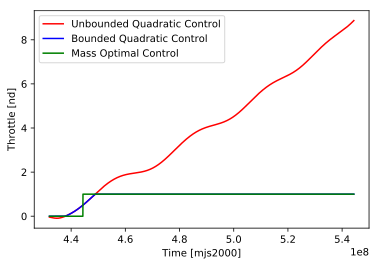

In [11]:
plt.figure()
plt.plot(ubqct[:,0], ubqct[:,15], 'r-')
plt.plot(qct[:,0], qct[:,15], 'b-')
plt.plot(mct[:,0], mct[:,15], 'g-')
plt.ylabel("Throttle [nd]")
plt.xlabel("Time [mjs2000]")
plt.legend(["Unbounded Quadratic Control", "Bounded Quadratic Control", "Mass Optimal Control"])
plt.show()

In [12]:
# parametres
atol = 1e-12
rtol = 1e-12
adapt=True

# unbounded quadratic control trajectory
leg.dynamics.alpha = 0
leg.dynamics.bound = False
ubqct = leg.get_trajectory(atol=atol, rtol=rtol, adapt=adapt)

# bounded quadratic control trajectory
leg.dynamics.bound = True
qct = leg.get_trajectory(atol=atol, rtol=rtol, adapt=adapt)

# mass optimal control trajectory
leg.dynamics.alpha = 1
mct = leg.get_trajectory(atol=atol, rtol=rtol, adapt=adapt)

/usr/lib/python3.6/site-packages/scipy/integrate/_ode.py:1035: UserWarning: dopri5: larger nmax is needed
  self.messages.get(idid, 'Unexpected idid=%s' % idid))


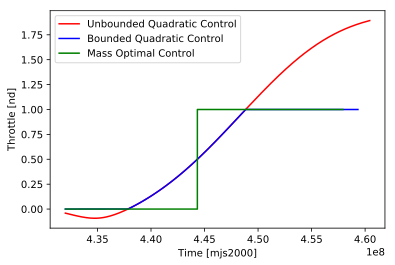

In [13]:
plt.figure()
plt.plot(ubqct[:,0], ubqct[:,15], 'r-')
plt.plot(qct[:,0], qct[:,15], 'b-')
plt.plot(mct[:,0], mct[:,15], 'g-')
plt.ylabel("Throttle [nd]")
plt.xlabel("Time [mjs2000]")
plt.legend(["Unbounded Quadratic Control", "Bounded Quadratic Control", "Mass Optimal Control"])
plt.show()